# Hypothesis Testing:
>Hypothesis testing using permutation

- toc: true 
- badges: true
- comments: true
- image:https://www.advanceinnovationgroup.com/blog/uploads/images/image_750x_5cc1653c3c4c9.jpg
- author: Uday Paila
- categories: [Hypothesis testing, null hypothesis, 2-sample test, one-sample-test, p-value, anova]

## Framework
1. We start with a null hypothesis (H0) that represents the currect state ( Nothing going on, =, <=, >=)
2. We also have an alternative hypothesis(HA) that represents the research question we are testing. ( something is hoing on, !=, >, <)
3. We conduct a hypothesis test under the assumption that null hypothesis is true, either via simulation(Permutation test) or theoretical test using CLT.
    1. Choose a test statistic
    2. Compute the test statistic.
    3. Determine the frequency distribution of the test statistic under the hypothesis.
    4. Make a decision using this distribution as a guide as discussed in the point-4.
4. If the test results suggest that the data do not provide convincing evidence for the alternative hypothesis, we stick with the null hypothesis. If they do, then we reject the null hypothesis in the favor of the alternate hypothesis. If P value is low (Lower than significance level), we say that it is unlikely to observe the data if the null hypotheis were true, and hence reject the null hypothesis. If it is High, we won't reject the null hypothesis.                   
5. Always construct hypotheses about population parameters (e.g. population mean, μ) and not the sample statistics (e.g. sample mean)  
6. Note that the alternative hypothesis might be one-sided (μ < or > the null value) or two-sided (μ≠ the null value), and the choice depends on the research question.

<br>

>Important: P Value is the probability of obtaining a value of your test statistic that is at least as extream as what ws observed, under the assumption the null hypothesis is true. It is not the probability that the null hypothesis is True.


<br>


>Note: P Value = Conditional probability of data given null hypothesis is true = P(observed or more extreme sample statistic ∣ H0 true)




### Steps 
1. Analyze the problem and state the Null Hypothesis
2. State the Alternate Hypothesis
3. Choose a test statistic and Compute the test statistic
4. Determine the frequency distribution of the test statistic under the hypothesis.
5. Calculate the P-Value for your CL based on two tail/single tail. 
6. Make a decision. 

<br>

You can do one tailed or two tailed test based on the alternate hypothesis. 
 - A two sided Hypothesis with significance level alpha is equivalent to a confidence interval with $CL = 1 - \alpha$
 - A one sided Hypothesis with significance level alpha is equivalent to a confidence interval with $CL = 1- (2*\alpha)$

!['hypothesis cl'](https://miro.medium.com/max/862/1*VXxdieFiYCgR6v7nUaq01g.jpeg "Credit:https://towardsdatascience.com/everything-you-need-to-know-about-hypothesis-testing-part-i-4de9abebbc8a")

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [37]:
#you can download the data from https://www.kaggle.com/spscientist/students-performance-in-exams
sample_data = pd.read_csv("datasets_74977_169835_StudentsPerformance.csv")

In [44]:
##sample data 
sample_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [40]:
##value counts of educatioin level
sample_data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [43]:
#test preparation 
sample_data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

## Comparing two independent samples
1. 2 groups must be independent with-in groups as well as between the groups. 
2. If we have skewness in the sample distribution, we need more samples for hypothesis testing. 

#### Problem Statement
We have to check whether there is a difference in the math score in students who completed the preparation course and not.

In [45]:
###math scores of test completed and not completed
math_score_with_test = sample_data['math score'][sample_data['test preparation course']=='completed']
math_score_wo_test = sample_data['math score'][sample_data['test preparation course']=='none']

In [48]:
##no of students
print("No of students completed the course", len(math_score_with_test))
print("No of students not completed the course", len(math_score_wo_test))

No of students completed the course 358
No of students not completed the course 642


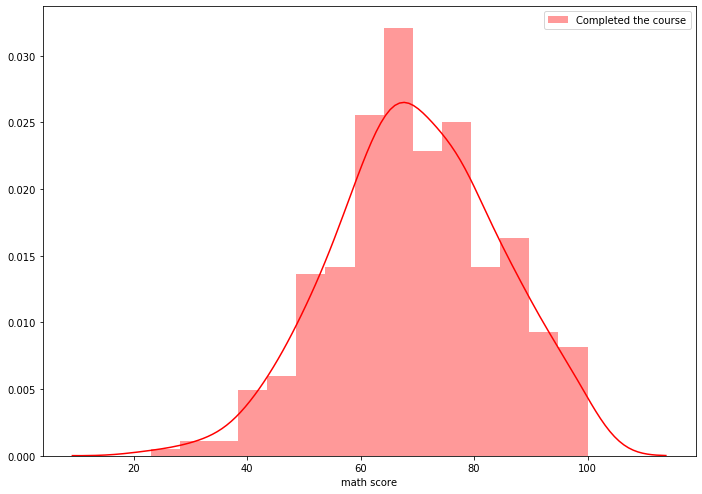

In [54]:
#Plotting distribution of mathscores of compeleted students
sns.distplot(math_score_with_test, hist=True, kde=True, color='red', norm_hist=True, label="Completed the course")
plt.legend()

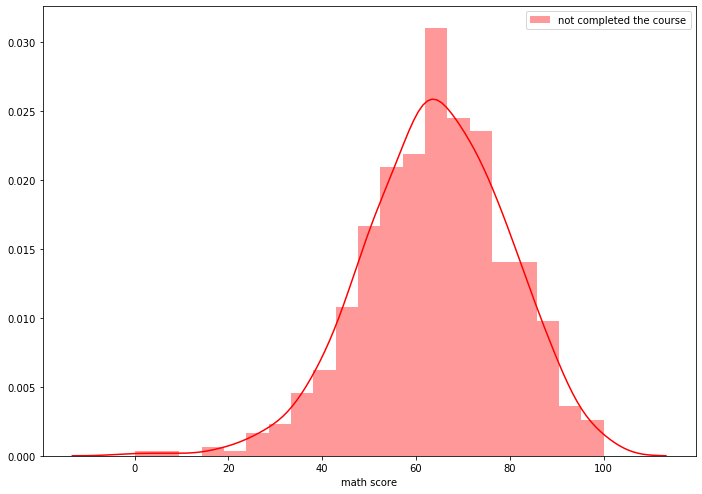

In [53]:
#Plotting distribution of mathscores of not compeleted students
sns.distplot(math_score_wo_test, hist=True, kde=True, color='red', norm_hist=True, label="not completed the course")
plt.legend()

Step-1: We can compare the mean scores of both groups. so Null Hypothesis is "There is no difference in both groups"  
H0 = There is no difference between the two groups.  
                    mu_group1 = mu_group2  
                    mu_group1 - mu_group2 = 0  

<br>

Step-2: Alternate Hypothesis is "There is a difference between the two groups"  
                H0 = There is no difference between the two groups.   
                    mu_group1 != mu_group2  
                    mu_group1 - mu_group2 != 0  

<br>

Step-3: Test Statistic and Calculate the Observed Test Statistic  
                T_obs = observed_group1_mean - observed_group2_mean = 5.617649106319291  

In [62]:
T_obs = math_score_with_test.mean() - math_score_wo_test.mean()
T_obs

5.617649106319291

Step-4: Simulate the distribution using the permutation test  
#### Permutation simulation 
Let's say we have n1 elements in group1 and n2 elements in the group2. 
1. Combine the group1, group2. 
2. for each permutation data sample
    1. take first n1 elements as group1, rest n2 samples as group2. 
    2. calculate the test statistic

#### Code

In [67]:
##we can get the permutations from np.random.permutations. 
for i in range(5):
    print(np.random.permutation([1, 2, 3, 4, 5]))

[3 2 4 1 5]
[4 3 5 1 2]
[5 1 3 4 2]
[4 2 3 1 5]
[3 2 5 1 4]


In [102]:
data_sample = np.concatenate([math_score_with_test, math_score_wo_test])
n1 = len(math_score_with_test)
dist_test_stat = []
np.random.seed(85)
for i in range(1000000):
    out = np.random.permutation(data_sample) ##random permutation
    ts_cal = out[:n1].mean() - out[n1:].mean() ##getting stat difference
    dist_test_stat.append(ts_cal)

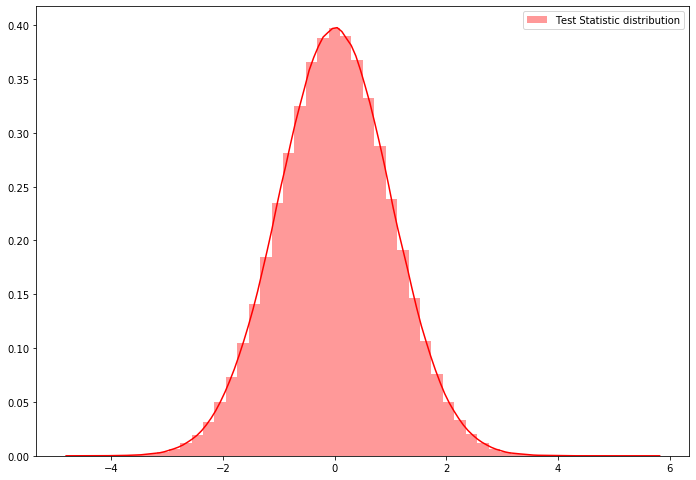

In [103]:
sns.distplot(dist_test_stat, hist=True, kde=True, color='red', norm_hist=True, label="Test Statistic distribution")
plt.legend()

In [195]:
prob = sum(np.array(dist_test_stat)>=T_obs)/1000000

In [110]:
prob

1e-06

Step-5: Calculation the P-Value

For two tailed test $\text{P Value} = 2*min([0.5, prob, 1-prob])$

one tailed test with 'greater than' alternate hypothesis  $\text{P Value} = prob$

one tailed test with 'less than' alternate hypothesis  $\text{P Value} = 1- (prob)$


In [112]:
P_value = 2*np.min([0.5, prob, 1-prob])
print('P_value', P_value)

P_value 2e-06


Step-6: Make a Decision:

For Significance Level of 5% (95% CL), P_value is very less so we reject the null hypothisis in favour of alternate. 


>Note: In place of Test Statistic, you can use any formulation even t test stat also.

You can do all the avove with permute module of Python. 

#### Code with permute module

In [128]:
from permute.core import two_sample
sample_test = two_sample(x=math_score_with_test, y=math_score_wo_test, reps=100000, 
                         stat='mean', alternative='two-sided', keep_dist=True, seed=10)

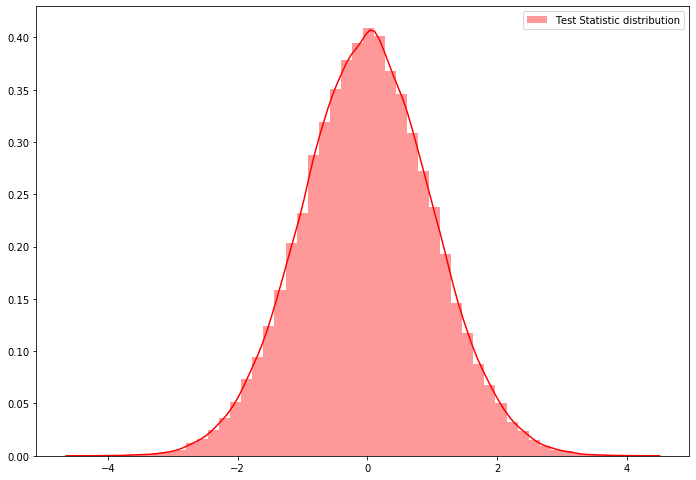

In [161]:
sns.distplot(sample_test[2], hist=True, kde=True, color='red', norm_hist=True, label="Test Statistic distribution")
plt.legend()

In [162]:
print("observed test Statistic", sample_test[1])
print("P-Value", sample_test[0])

observed test Statistic 5.617649106319291
P-Value 1.999980000199998e-05


#### Another way to test
1. Get the CI of the mean(any stat) of two samples. 
2. If those CI not overlap, there is a difference between those. 

In [167]:
from arch.bootstrap import IIDBootstrap
bs = IIDBootstrap(math_score_with_test)
print('Studentized-t CI of scores of test completed students-->', bs.conf_int(func=np.mean, reps=1000, method='bca', size=0.95))

Studentized-t CI of scores of test completed students--> [[68.34468215]
 [71.1424581 ]]


In [168]:
bs = IIDBootstrap(math_score_wo_test)
print('Studentized-t CI of scores of test not completed students-->', bs.conf_int(func=np.mean, reps=1000, method='bca', size=0.95))

Studentized-t CI of scores of test not completed students--> [[62.91883691]
 [65.28373942]]


There is no overlap between these 95% CI, so there is a difference. 

>Tip: What if we want to check mu_group1 - mu_group2 = some_number?  We can formulate that as  mu_group1 - mu_group2 - some_number = 0 => mu_group1 - (mu_group2 + some_number) = 0 or (mu_group1 - some_number) - mu_group2 = 0                  

## Comparing two dependent samples(Paired Test):
This type of test may be needed for pre-post study on the same people or repeated measures on the same set of people. 
In our sample data, let's say we want to compare scores of reading and writing that are equal or not. 
- In the above problem, students are same in the both samples. so there is a dependency, they are not independent. 
- Two groups must be of same size because its a paired data.(n1=n2=n)

<br>

How to solve? 

1. Get the difference(any value that you want to find) of two samples, so we will get n samples. 
2. Do 1 sample hypothesis test to find the difference is zero or not. or use bootstrapping to get the CI and check. 

<br>

#### One-sample Hypothesis test using permutation
We have to check whether our mean(any stat) is centered around the zero or not. We don't have two samples to permute so we can add random positive and negative signs and we can shuffle those signs to get the hypothesis null distribution. 

In [216]:
reading_score = sample_data['reading score']
writing_score = sample_data['writing score']
diff_score = reading_score - writing_score

Step-1: Null Hypothesis is "difference of both scores is zero"  
                H0 = the difference between both scores is zero.   
                      mean_diff_score = 0  

<br>

Step-2: Alternate Hypothesis is "There is a difference in both scores"  
                H0 = There is a difference in both scores.   
                      mean_diff_score != 0  
                      
<br>

Step-3: Test Statistic and Calculate the Observed Test Statistic  
                T_obs = mean(diff_score)  

In [217]:
T_obs = diff_score.mean()
print(T_obs)

1.115


Step-4: Simulate the distribution using the permutation test

#### one sample Permutation simulation: 
Let's say we have n elements. 
1. for M number of iterations
    1. Generate random negative and positive signs of length n. 
    2. assign those signs to the elements
    3. calculate the statistic value. 

#### Code

In [219]:
def generate_n_random_signs(n):
    return 1- 2* np.random.binomial(1, 0.5, size=n)
generate_n_random_signs(10)*np.random.randint(1, 10, 10)

array([ 9,  9,  4,  4, -4, -4,  9,  3, -3,  1])

In [221]:
dist_test_stat = []
np.random.seed(85)
n = len(diff_score)
for i in tqdm(range(1000000)):
    out = generate_n_random_signs(n) * diff_score
    ts_cal = out.mean()
    dist_test_stat.append(ts_cal)

100%|██████████████████████████████████████████████████████████████████████| 1000000/1000000 [08:04<00:00, 2062.25it/s]


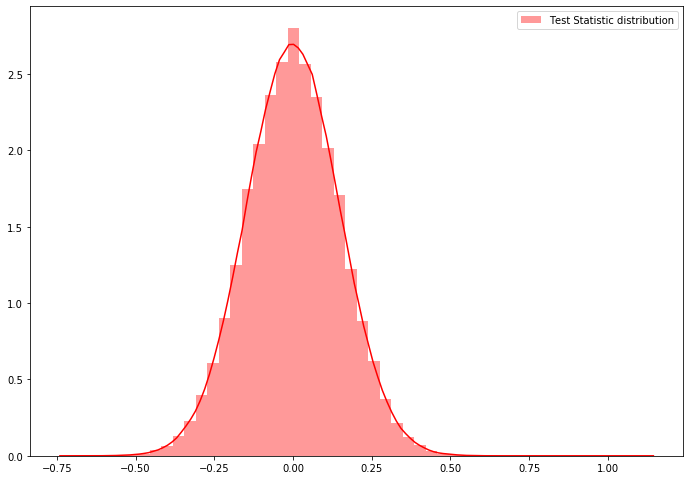

In [228]:
##plotting
sns.distplot(dist_test_stat, hist=True, kde=True, color='red', norm_hist=True, label="Test Statistic distribution")
plt.legend()

In [229]:
prob = sum(np.array(dist_test_stat)>=T_obs)/1000000

Step-5: Calculation the P Value

In [230]:
P_value = 2*np.min([0.5, prob, 1-prob])
print('P_value', P_value)

P_value 2e-06


Step-6: Make a Decision:

For Significance Level of 5% (95% CL), P value is very less so we reject the null hypothisis in favour of alternate. 


You can do all the avove with permute module of Python. 

#### Code with permute module

In [245]:
from permute.core import one_sample
one_sample_test = one_sample(x=diff_score, reps=100000, 
                         stat='mean', alternative='two-sided', keep_dist=False, seed=10)

In [246]:
print("observed test Statistic", one_sample_test[1])
print("P-Value", one_sample_test[0])

(1.999980000199998e-05, 1.115)

## Comparing N independent samples: ( Permutation ANOVA) 
1. N groups must be independent with-in groups as well as between the groups. 
2. If we have skewness in the sample distribution, we need more samples for hypothesis testing. 

You can read about ANOVA at [this](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/) or [this](https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/).  


<br>

#### One-Way ANOVA: 
Using one way ANOVA, we can compare the K groups variability. Those K groups must be independent. 

Test statistic for one way ANOVA = $\sum_{k=1}^K n_k(\overline{X_k} - \overline{X})^2$  
$n_k$ = number of samples in group k  
$\overline{X_k}$ = Mean of group k  
$\overline{X}$ = Total mean (All groups)

Except for the test statistic, everything is the same, we will permute the groups and calculate the test stat distribution. 

<br>

##### Steps:
1. Null Hypothesis - all the means are equal
2. Alternate Hypothesis - all means are not equal
4. Calculate the observed test statistic
4. n times:  
    4.1. permute the values. take the first n1 as the first group, next n2 as the second group, .. nk as kth group.   
    4.2. calculate the test statistic using the above formula and add to the final dist.       
4. Plot the distribution and calculate the P-value. 

<br>


You can do above all with permute


In [250]:
sample_data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [257]:
math_scores = sample_data['math score']
education_groups = sample_data['parental level of education'].values

Null Hypothesis = math scores of every group of education is same.  
Alternate Hypothesis = math scores are different in groups.  

In [263]:
from permute.ksample import k_sample
ns_oneway_anova = k_sample(x=math_scores, group=education_groups, reps=100000, stat='one-way anova', keep_dist=True, seed=10 )

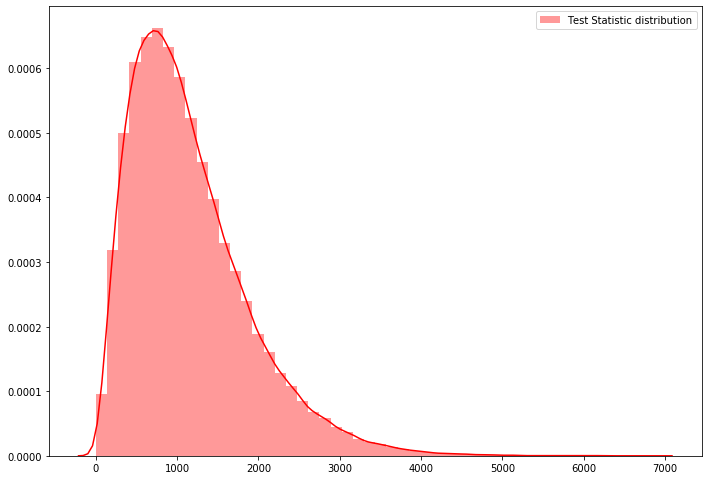

In [265]:
sns.distplot(ns_oneway_anova[2], hist=True, kde=True, color='red', norm_hist=True, label="Test Statistic distribution")
plt.legend()

In [266]:
print("observed test Statistic", ns_oneway_anova[1])
print("P-Value", ns_oneway_anova[0])

observed test Statistic 7295.561831098111
P-Value 9.99990000099999e-06


We can do two way anowas with `permute.ksample.bivariate_k_sample`